In [19]:
#Importing required librarie
import pandas as pd
import seaborn as sns
df=pd.read_csv(r"C:\Users\RAGHAVENDRA KUMAR\ML\NLP\South Indian_movies.csv")
df.drop("Unnamed: 0",axis=1,inplace=True)
df

,movie_name,comment,sentiment
0,Baahubali,An epic masterpiece with stunning visuals.,positive
1,RRR,Incredible performances and visuals.,positive
2,KGF,Amazing story and cinematography.,positive
3,Kalki,Thrilling and engaging plot.,positive
4,Pushpa,Allu Arjun delivered an amazing performance.,positive
...,...,...,...
94,Brahmotsavam,Lacks coherence and depth.,negative
95,Sahoo,Overhyped and underdelivered.,negative
96,Vinaya Vidheya Rama,"Excessive action, weak plot.",negative
97,Agnyaathavaasi,Disjointed narrative and dull moments.,negative


In [2]:
df.loc[df["sentiment"]=="negative"]

,movie_name,comment,sentiment
93,Sakshyam,Unoriginal and predictable.,negative
94,Brahmotsavam,Lacks coherence and depth.,negative
95,Sahoo,Overhyped and underdelivered.,negative
96,Vinaya Vidheya Rama,"Excessive action, weak plot.",negative
97,Agnyaathavaasi,Disjointed narrative and dull moments.,negative
98,Naa Peru Surya,Excessive melodrama.,negative


<Axes: xlabel='sentiment', ylabel='count'>

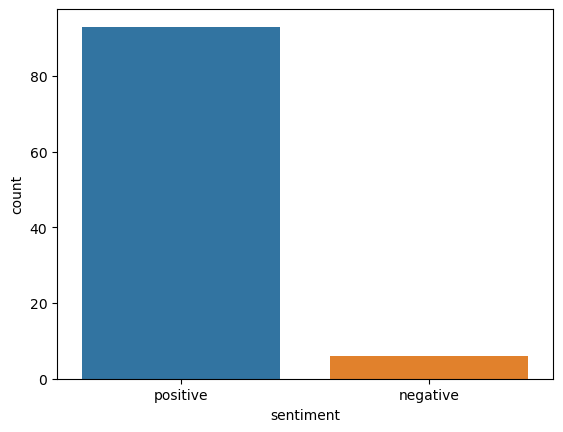

In [21]:
sns.countplot(x=df["sentiment"],hue=df["sentiment"])

In [3]:
negative_reviews=df.loc[df["sentiment"]=="negative","comment"]
negative_reviews

93               Unoriginal and predictable.
94                Lacks coherence and depth.
95             Overhyped and underdelivered.
96              Excessive action, weak plot.
97    Disjointed narrative and dull moments.
98                      Excessive melodrama.
Name: comment, dtype: object

In [6]:
negetive_comments=" ".join(negative_reviews.values)
negetive_comments

'Unoriginal and predictable. Lacks coherence and depth. Overhyped and underdelivered. Excessive action, weak plot. Disjointed narrative and dull moments. Excessive melodrama.'

In [4]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

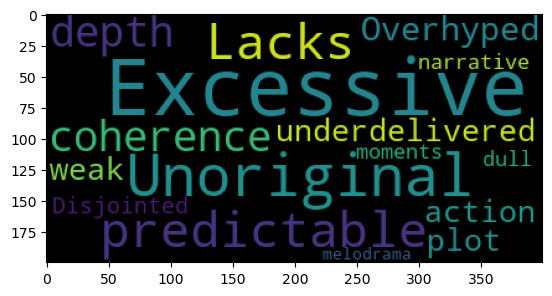

In [7]:
cloud=WordCloud().generate(negetive_comments)
plt.imshow(cloud)

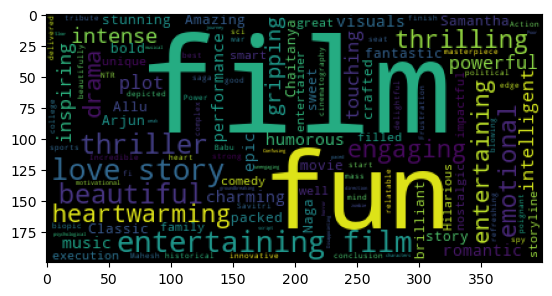

In [8]:
positive_reviews=df.loc[df["sentiment"]=="positive","comment"]
positive_comments=" ".join(positive_reviews.values)
cloud=WordCloud().generate(positive_comments)
plt.imshow(cloud)

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
bow=CountVectorizer(stop_words="english")

In [17]:
import pickle
pickle.dump(bow,open("bow_vectorization.pkl","wb"))
vect=pickle.load(open("bow_vectorization.pkl","rb"))
vect

CountVectorizer(stop_words='english')

In [10]:
x=df.drop("sentiment",axis=1)
y=df["sentiment"]

In [11]:
X=pd.DataFrame(bow.fit_transform(x["comment"]).toarray(),columns=bow.get_feature_names_out())
X

,action,allu,amazing,arjun,babu,beautiful,beautifully,best,biopic,blowing,...,touching,tribute,underdelivered,unengaging,unique,unoriginal,visuals,war,weak,zombie
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
95,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
96,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
97,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=23)

# Navie bayes

In [13]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
NB=MultinomialNB()
NB.fit(X_train,y_train)
y_pred=NB.predict(X_test)
accuracy_score(y_test,y_pred)

0.9

# Knn

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
accuracy_score(y_test,y_pred)

0.85

# Model Deployment

In [15]:
import warnings
warnings.filterwarnings("ignore")
comment=input("Enter the comment : ")
data=bow.transform([comment]).toarray()
NB.predict(data)[0]

Enter the comment :  Thrilling


'positive'

# Dumping

In [16]:
import pickle
pickle.dump(NB,open("South Telugu Movies Reviews.pkl","wb"))
model=pickle.load(open("South Telugu Movies Reviews.pkl","rb"))
model

MultinomialNB()